### XEducation Linear Regression Case Study

In [1]:
import numpy as np
import pandas as pd

## 1. Loading and Analysing Leads Data

In [2]:
leads_data_raw=pd.read_csv("C:\\Users\\sonsh\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")


In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
leads_data_raw.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Inspecting the Data

In [4]:
leads_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads_data_raw.shape

(9240, 37)

In [6]:
leads_data_raw.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the percentage of missing values
round(100*(leads_data_raw.isnull().sum()/len(leads_data_raw.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping the columns which has more than 35% nulls

In [8]:
leads_data_raw=leads_data_raw.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Activity'],1)

In [9]:
leads_data_raw.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000


In [10]:
## Newspaper Article has ver high correlation 0.71 with X Education Forums hence deleting it


## 3.  Cleaning and Data Preparation

### Converting binary variables(yes/no) to (0/1)

In [11]:
varlist = ["Do Not Email"
,"Do Not Call"
,"Search"
,"Magazine"
,"Newspaper Article"
,"Newspaper"
,"Digital Advertisement"
,"Through Recommendations"
,"X Education Forums"
,"Receive More Updates About Our Courses"
,"Update me on Supply Chain Content"
,"Get updates on DM Content"
,"I agree to pay the amount through cheque"
,"A free copy of Mastering The Interview"]

def bin_convert(x) :
    return x.map({"Yes" : 1 , "No" : 0})

leads_data_df=leads_data_raw
leads_data_df[varlist] = leads_data_df[varlist].apply(bin_convert)

In [12]:
leads_data_df[varlist]

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,X Education Forums,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9238,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Varifying it for one of the column
leads_data_raw["Do Not Email"].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [14]:
leads_data_raw.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
Lead Number,1.000000,-0.098529,0.011913,0.025157,0.022223,0.020329,0.058808,-0.012777,NaN,-0.012294,-0.003154,0.004597,-0.017713,-0.005777,NaN,NaN,NaN,NaN,-0.109696
Do Not Email,-0.098529,1.000000,-0.004322,-0.135580,0.033842,-0.046374,0.033582,-0.011443,NaN,-0.004322,-0.003056,-0.003056,-0.006113,-0.008088,NaN,NaN,NaN,NaN,0.055762
Do Not Call,0.011913,-0.004322,1.000000,0.018581,0.003221,0.006801,-0.005918,-0.000573,NaN,-0.000216,-0.000153,-0.000153,-0.000306,-0.000405,NaN,NaN,NaN,NaN,-0.009921
Converted,0.025157,-0.135580,0.018581,1.000000,0.030395,0.362483,-0.003328,-0.002261,NaN,0.003465,-0.008238,-0.008238,-0.005789,0.018607,NaN,NaN,NaN,NaN,-0.039820
TotalVisits,0.022223,0.033842,0.003221,0.030395,1.000000,0.221240,0.512125,0.049527,NaN,0.033757,0.035744,0.014153,0.023991,0.034191,NaN,NaN,NaN,NaN,0.202273
Total Time Spent on Website,0.020329,-0.046374,0.006801,0.362483,0.221240,1.000000,0.320361,0.012654,NaN,0.011326,0.006195,0.025142,0.007607,0.023186,NaN,NaN,NaN,NaN,0.168298
Page Views Per Visit,0.058808,0.033582,-0.005918,-0.003328,0.512125,0.320361,1.000000,0.033258,NaN,0.023232,0.000665,0.004691,0.021945,0.019822,NaN,NaN,NaN,NaN,0.277263
Search,-0.012777,-0.011443,-0.000573,-0.002261,0.049527,0.012654,0.033258,1.000000,NaN,0.188573,0.267073,-0.000405,0.132950,0.302318,NaN,NaN,NaN,NaN,-0.002256
Magazine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Newspaper Article,-0.012294,-0.004322,-0.000216,0.003465,0.033757,0.011326,0.023232,0.188573,NaN,1.000000,0.707069,-0.000153,0.353362,0.266986,NaN,NaN,NaN,NaN,0.005950


#### Creating a list of columns for which Data imputation can be done

In [15]:
cat_list=["Lead Origin"
,"Lead Source"
#,"Last Activity"
,"Country"
,"Specialization"
,"How did you hear about X Education"
,"What is your current occupation"
,"What matters most to you in choosing a course"
#,"Tags"
,"Lead Quality"
,"Lead Profile"
,"City"
#,"Asymmetrique Activity Index"
#,"Asymmetrique Profile Index"
,"Last Notable Activity"]


#### Renaming the long Column Names 

In [16]:
#leads_data_df.rename({'How did you hear about X Education': 'PromoSourcec', 'What is your current occupation': 'Occupation',"Receive More Updates About Our Courses":"ReceiveUpdates","I agree to pay the amount through cheque":"ChequePay","A free copy of Mastering The Interview" : "FreeInterviewCopy" , "Total Time Spent on Website" : "TotalTimeWebsite","Asymmetrique Activity Index" : "AActivityIndex","Asymmetrique Profile Index" : "AProfileIndex","Asymmetrique Activity Score" : "AActivityScore","Asymmetrique Profile Score" : "AProfileScore","Update me on Supply Chain Content" : "UpdateSupplychain","Page Views Per Visit" :"ViewsPerVisit","What matters most to you in choosing a course" : "criteria"}, axis=1, inplace=True)
leads_data_df.rename({'How did you hear about X Education': 'PromoSourcec', 'What is your current occupation': 'Occupation',"Receive More Updates About Our Courses":"ReceiveUpdates","I agree to pay the amount through cheque":"ChequePay","A free copy of Mastering The Interview" : "FreeInterviewCopy" , "Total Time Spent on Website" : "TotalTimeWebsite","Update me on Supply Chain Content" : "UpdateSupplychain","Page Views Per Visit" :"ViewsPerVisit","What matters most to you in choosing a course" : "criteria"}, axis=1, inplace=True)

#### Varifying the columns and % of null data

In [17]:
# Checking the percentage of missing values
round(100*(leads_data_df.isnull().sum()/len(leads_data_df.index)), 2)

Prospect ID                   0.00
Lead Number                   0.00
Lead Origin                   0.00
Lead Source                   0.39
Do Not Email                  0.00
Do Not Call                   0.00
Converted                     0.00
TotalVisits                   1.48
TotalTimeWebsite              0.00
ViewsPerVisit                 1.48
Country                      26.63
Specialization               15.56
PromoSourcec                 23.89
Occupation                   29.11
criteria                     29.32
Search                        0.00
Magazine                      0.00
Newspaper Article             0.00
X Education Forums            0.00
Newspaper                     0.00
Digital Advertisement         0.00
Through Recommendations       0.00
ReceiveUpdates                0.00
Tags                         36.29
UpdateSupplychain             0.00
Get updates on DM Content     0.00
Lead Profile                 29.32
City                         15.37
ChequePay           

#### 4 columns "Specialization","PromoSourcec","City","Country" has significant number of Values as *Select* hence replacing it with null to impute them

In [18]:
impute_data=["Specialization","PromoSourcec","City","Country","Occupation","criteria","Lead Profile","AActivityIndex","AProfileIndex","Tags","AActivityScore","AProfileScore"]
leads_data_df[impute_data[0]].replace("Select", np.nan, inplace= True)
leads_data_df[impute_data[1]].replace("Select", np.nan, inplace= True)
leads_data_df[impute_data[2]].replace("Select", np.nan, inplace= True)
leads_data_df[impute_data[3]].replace("Select", np.nan, inplace= True)

#### After repacing Select with NAN checking the actual % of nulls in abve 4 columns

In [19]:
# Checking the percentage of missing values
round(100*(leads_data_raw.isnull().sum()/len(leads_data_raw.index)), 2)

Prospect ID                   0.00
Lead Number                   0.00
Lead Origin                   0.00
Lead Source                   0.39
Do Not Email                  0.00
Do Not Call                   0.00
Converted                     0.00
TotalVisits                   1.48
TotalTimeWebsite              0.00
ViewsPerVisit                 1.48
Country                      26.63
Specialization               36.58
PromoSourcec                 78.46
Occupation                   29.11
criteria                     29.32
Search                        0.00
Magazine                      0.00
Newspaper Article             0.00
X Education Forums            0.00
Newspaper                     0.00
Digital Advertisement         0.00
Through Recommendations       0.00
ReceiveUpdates                0.00
Tags                         36.29
UpdateSupplychain             0.00
Get updates on DM Content     0.00
Lead Profile                 29.32
City                         39.71
ChequePay           

In [20]:
## Droping promosource as it has  78% nulls
leads_data_df=leads_data_df.drop(['PromoSourcec','City','Specialization'],1)

#### Imputing the above columns

In [21]:
#leads_data_df[impute_data[0]]=leads_data_df[impute_data[0]].fillna(leads_data_df[impute_data[0]].mode()[0])
#leads_data_df[impute_data[1]]=leads_data_df[impute_data[1]].fillna(leads_data_df[impute_data[1]].mode()[0])
#leads_data_df[impute_data[2]]=leads_data_df[impute_data[2]].fillna(leads_data_df[impute_data[2]].mode()[0])
leads_data_df[impute_data[3]]=leads_data_df[impute_data[3]].fillna(leads_data_df[impute_data[3]].mode()[0])
leads_data_df[impute_data[4]]=leads_data_df[impute_data[4]].fillna(leads_data_df[impute_data[4]].mode()[0])
leads_data_df[impute_data[5]]=leads_data_df[impute_data[5]].fillna(leads_data_df[impute_data[5]].mode()[0])
leads_data_df[impute_data[6]]=leads_data_df[impute_data[6]].fillna(leads_data_df[impute_data[6]].mode()[0])
#leads_data_df[impute_data[7]]=leads_data_df[impute_data[7]].fillna(leads_data_df[impute_data[7]].mode()[0])
#leads_data_df[impute_data[8]]=leads_data_df[impute_data[8]].fillna(leads_data_df[impute_data[8]].mode()[0])
leads_data_df[impute_data[9]]=leads_data_df[impute_data[9]].fillna(leads_data_df[impute_data[9]].mode()[0])
#leads_data_df[impute_data[10]]=leads_data_df[impute_data[10]].fillna(leads_data_df[impute_data[10]].mean())
#leads_data_df[impute_data[11]]=leads_data_df[impute_data[11]].fillna(leads_data_df[impute_data[11]].mean())


##leads_data_df[impute_data[6]]=leads_data_df[impute_data[6]].fillna(leads_data_df[impute_data[6]].mode()[0])


#### Varifying the null value % again

In [22]:
round(100*(leads_data_df.isnull().sum()/len(leads_data_df.index)), 2)

Prospect ID                  0.00
Lead Number                  0.00
Lead Origin                  0.00
Lead Source                  0.39
Do Not Email                 0.00
Do Not Call                  0.00
Converted                    0.00
TotalVisits                  1.48
TotalTimeWebsite             0.00
ViewsPerVisit                1.48
Country                      0.00
Occupation                   0.00
criteria                     0.00
Search                       0.00
Magazine                     0.00
Newspaper Article            0.00
X Education Forums           0.00
Newspaper                    0.00
Digital Advertisement        0.00
Through Recommendations      0.00
ReceiveUpdates               0.00
Tags                         0.00
UpdateSupplychain            0.00
Get updates on DM Content    0.00
Lead Profile                 0.00
ChequePay                    0.00
FreeInterviewCopy            0.00
Last Notable Activity        0.00
dtype: float64

#### Dropping the other null values as % is very less

In [23]:
leads_data_df=leads_data_df.dropna()

In [24]:
leads_data_df.isna().sum()

Prospect ID                  0
Lead Number                  0
Lead Origin                  0
Lead Source                  0
Do Not Email                 0
Do Not Call                  0
Converted                    0
TotalVisits                  0
TotalTimeWebsite             0
ViewsPerVisit                0
Country                      0
Occupation                   0
criteria                     0
Search                       0
Magazine                     0
Newspaper Article            0
X Education Forums           0
Newspaper                    0
Digital Advertisement        0
Through Recommendations      0
ReceiveUpdates               0
Tags                         0
UpdateSupplychain            0
Get updates on DM Content    0
Lead Profile                 0
ChequePay                    0
FreeInterviewCopy            0
Last Notable Activity        0
dtype: int64

In [25]:
leads_data_df.select_dtypes(include=['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Country', 'Occupation',
       'criteria', 'Tags', 'Lead Profile', 'Last Notable Activity'],
      dtype='object')

In [26]:
leads_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
Prospect ID                  9074 non-null object
Lead Number                  9074 non-null int64
Lead Origin                  9074 non-null object
Lead Source                  9074 non-null object
Do Not Email                 9074 non-null int64
Do Not Call                  9074 non-null int64
Converted                    9074 non-null int64
TotalVisits                  9074 non-null float64
TotalTimeWebsite             9074 non-null int64
ViewsPerVisit                9074 non-null float64
Country                      9074 non-null object
Occupation                   9074 non-null object
criteria                     9074 non-null object
Search                       9074 non-null int64
Magazine                     9074 non-null int64
Newspaper Article            9074 non-null int64
X Education Forums           9074 non-null int64
Newspaper                    9074 non-null int64
D

In [28]:
leads_data_raw.shape

(9240, 31)

In [27]:
leads_data_df.shape

(9074, 28)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [29]:
catCollist=list(leads_data_df.select_dtypes(include=['object']).columns)
catCollist.remove('Prospect ID')
catCollist

['Lead Origin',
 'Lead Source',
 'Country',
 'Occupation',
 'criteria',
 'Tags',
 'Lead Profile',
 'Last Notable Activity']

In [30]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
leads_data_df_dummy1 = pd.get_dummies(leads_data_df[catCollist], drop_first=True)

# Adding the results to the master dataframe
leads_data_df = pd.concat([leads_data_df, leads_data_df_dummy1], axis=1)

In [31]:
leads_data_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'TotalTimeWebsite', 'ViewsPerVisit',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=140)

In [32]:
leads_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,TotalTimeWebsite,ViewsPerVisit,Country,Occupation,criteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,ReceiveUpdates,Tags,UpdateSupplychain,Get updates on DM Content,Lead Profile,ChequePay,FreeInterviewCopy,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,criteria_Flexibility & Convenience,criteria_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Select,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Select,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f

#### Dropping the repeated variables

In [33]:
leads_data_df = leads_data_df.drop(catCollist, 1)

list(leads_data_df.select_dtypes(include=['integer']).columns)

In [34]:
leads_data_df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,TotalTimeWebsite,ViewsPerVisit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,ReceiveUpdates,UpdateSupplychain,Get updates on DM Content,ChequePay,FreeInterviewCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,criteria_Flexibility & Convenience,criteria_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,907

#### Checking for Outliers

In [35]:
# Checking for outliers in the continuous variables
num_leads_data_df = leads_data_df[['TotalVisits','TotalTimeWebsite','ViewsPerVisit']]

In [36]:
num_leads_data_df.describe()

,TotalVisits,TotalTimeWebsite,ViewsPerVisit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


In [37]:
q_TotalVisits=num_leads_data_df.TotalVisits.quantile(.95)
q_TotalTimeWebsite=num_leads_data_df.TotalTimeWebsite.quantile(.95)
q_ViewsPerVisit=num_leads_data_df.ViewsPerVisit.quantile(.95)

In [38]:
q_TotalVisits

10.0

#### Imputing the high Outiers with 0.95 Quantile values 

In [39]:
leads_data_df.TotalVisits[(leads_data_df['TotalVisits'] >q_TotalVisits)] =q_TotalVisits
leads_data_df.TotalTimeWebsite[(leads_data_df['TotalTimeWebsite'] >q_TotalTimeWebsite)] =q_TotalTimeWebsite
leads_data_df.ViewsPerVisit[(leads_data_df['ViewsPerVisit'] >q_ViewsPerVisit)] =q_ViewsPerVisit

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [40]:
leads_data_df[['TotalVisits','TotalTimeWebsite','ViewsPerVisit']].describe()

,TotalVisits,TotalTimeWebsite,ViewsPerVisit
count,9074.000000,9074.000000,9074.000000
mean,3.191867,474.472559,2.265943
std,2.780618,526.060205,1.790991
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,10.000000,1557.000000,6.000000


### Step 4: Test-Train Split


In [41]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = leads_data_df.drop(['Converted','Prospect ID',"Lead Number"], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,TotalTimeWebsite,ViewsPerVisit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,ReceiveUpdates,UpdateSupplychain,Get updates on DM Content,ChequePay,FreeInterviewCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,criteria_Flexibility & Convenience,criteria_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [42]:
# Putting response variable to y
y = leads_data_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
leads_data_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,TotalTimeWebsite,ViewsPerVisit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,ReceiveUpdates,UpdateSupplychain,Get updates on DM Content,ChequePay,FreeInterviewCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,criteria_Flexibility & Convenience,criteria_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

In [46]:
scaler = StandardScaler()

X_train[['TotalVisits','TotalTimeWebsite','ViewsPerVisit']] = scaler.fit_transform(X_train[['TotalVisits','TotalTimeWebsite','ViewsPerVisit']])

X_train.head()

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,TotalVisits,TotalTimeWebsite,ViewsPerVisit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,ReceiveUpdates,UpdateSupplychain,Get updates on DM Content,ChequePay,FreeInterviewCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,criteria_Flexibility & Convenience,criteria_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.150296,-0.155018,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.543632,-0.155018,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.904666,-1.265540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.717578,-0.155018,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

#### Checking the Converted Rate

In [47]:
### Checking the Converted Rate
converted = (sum(leads_data_df['Converted'])/len(leads_data_df['Converted'].index))*100
converted

37.85541106458012

## Step 6: Looking at Correlations

In [48]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

leads_data_df.corr()

## Step 7: Model Building


### Running First Training Model

In [49]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                          119
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1349.2
Date:                Mon, 06 Jan 2020   Deviance:                       2698.5
Time:                        15:44:30   Pearson chi2:                 1.56e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     47.9072   2.23e+05      0.000      1.000   -4.36e+05    4.36e+05
Do Not Email                                              -1.4842      0.288     -5.150      0.000      -2.049      -0.919
Do Not Call                                               23.5582   1.24e+05      0.000      1.000   -2.43e+05    2.43e+05
TotalVisits                                                0.2128      0.084      2.548      0.011       0.049       0.376
TotalTimeWebsite                                           1.2078      0.061     19.701      0.000       1.088       1.328
ViewsPerVisit                                             -0.2175      0.094     -2.325      0.020      -0.401      -0.034
Search                                                    -1.7680      3.387     -0.522      0.602      -8.407       4.871
Magazine                                                8.987e-09   9.66e-05    9.3e-05      1.000      -0.000       0.000
Newspaper Article                                         26.7040   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
X Education Forums                                       -54.3953   3.05e+05     -0.000      1.000   -5.99e+05    5.99e+05
Newspaper                                                -21.1201   2.16e+05  -9.78e-05      1.000   -4.23e+05    4.23e+05
Digital Advertisement                                      0.2479      4.028      0.062      0.951      -7.646       8.142
Through Recommendations                                    4.7291      8.690      0.544      0.586     -12.303      21.761
ReceiveUpdates                                          9.959e-11   3.21e-05    3.1e-06      1.000    -6.3e-05     6.3e-05
UpdateSupplychain                                      -6.943e-09    3.8e-05     -0.000      1.000   -7.46e-05    7.46e-05
Get updates on DM Content                              -6.749e-09   3.44e-05     -0.000      1.000   -6.74e-05    6.74e-05
ChequePay                                               3.757e-08      0.000      0.000      1.000      -0.000       0.000
FreeInterviewCopy                                          0.0604      0.164      0.368      0.713      -0.261       0.382
Lead Origin_Landing Page Submission                       -0.3796      0.155     -2.442      0.015      -0.684      -0.075
Lead Origin_Lead Add Form                                 -2.6089      4.711     -0.554      0.580     -11.843       6.625
Lead Origin_Lead Import                                   27.5933   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                -3.9522      5.325     -0.742      0.458     -14.388       6.484
Lead Sou

## Step 8: Feature Selection Using RFE

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [52]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 43),
 ('TotalVisits', False, 62),
 ('TotalTimeWebsite', False, 11),
 ('ViewsPerVisit', False, 61),
 ('Search', False, 60),
 ('Magazine', False, 111),
 ('Newspaper Article', False, 40),
 ('X Education Forums', False, 59),
 ('Newspaper', False, 98),
 ('Digital Advertisement', False, 66),
 ('Through Recommendations', False, 72),
 ('ReceiveUpdates', False, 109),
 ('UpdateSupplychain', False, 108),
 ('Get updates on DM Content', False, 110),
 ('ChequePay', False, 112),
 ('FreeInterviewCopy', False, 87),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Direct Traffic', False, 46),
 ('Lead Source_Facebook', False, 90),
 ('Lead Source_Google', False, 49),
 ('Lead Source_Live Chat', False, 76),
 ('Lead Source_NC_EDM', False, 35),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Pay per Click Ads

In [54]:
col = X_train.columns[rfe.support_]

In [55]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'TotalTimeWebsite', 'ViewsPerVisit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=116)

##### Assessing the model with StatsModels

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1718.8
Date:                Mon, 06 Jan 2020   Deviance:                       3437.7
Time:                        15:44:35   Pearson chi2:                 2.15e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7935      0.198    -14.129      0.000      -3.181      -2.406
Do Not Email                                -1.3960      0.202     -6.914      0.000      -1.792      -1.000
Lead Origin_Lead Add Form                    1.2708      0.359      3.543      0.000       0.568       1.974
Lead Source_Welingak Website                 2.9839      0.818      3.649      0.000       1.381       4.586
Occupation_Working Professional              2.5502      0.261      9.783      0.000       2.039       3.061
Tags_Busy                                    4.1560      0.326     12.752      0.000       3.517       4.795
Tags_Closed by Horizzon                      9.4876      0.757     12.536      0.000       8.004      10.971
Tags_Lateral student                        26.6946   1.72e+04      0.002      0.999   -3.38e+04    3.38e+04
Tags_Lost to EINS                            9.9085      0.754     13.139      0.000       8.430      11.387
Tags_Ringing                                -1.0557      0.327     -3.224      0.001      -1.698      -0.414
Tags_Will revert after reading the email     4.9569      0.228     21.785      0.000       4.511       5.403
Lead Profile_Select                         -3.3785      0.156    -21.650      0.000      -3.684      -3.073
Lead Profile_Student of SomeSchool          -2.8152      0.973     -2.892      0.004      -4.723      -0.907
Last Notable Activity_SMS Sent               3.0853      0.117     26.349      0.000       2.856       3.315
============================================================================================================
"""

#### As there is high p value for Tags_Lateral student hence drping it from the model and rebuilding it

In [57]:
#as there is high p value for Tags_Lateral student hence drping it from the model and rebuilding it
col=col.drop("Tags_Lateral student")

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1726.8
Date:                Mon, 06 Jan 2020   Deviance:                       3453.7
Time:                        15:44:35   Pearson chi2:                 2.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7388      0.194    -14.152      0.000      -3.118      -2.359
Do Not Email                                -1.3994      0.202     -6.941      0.000      -1.795      -1.004
Lead Origin_Lead Add Form                    1.3771      0.361      3.815      0.000       0.670       2.085
Lead Source_Welingak Website                 2.8763      0.819      3.514      0.000       1.272       4.481
Occupation_Working Professional              2.5337      0.259      9.766      0.000       2.025       3.042
Tags_Busy                                    4.0696      0.322     12.641      0.000       3.439       4.701
Tags_Closed by Horizzon                      9.3852      0.755     12.431      0.000       7.906      10.865
Tags_Lost to EINS                            9.8162      0.752     13.046      0.000       8.341      11.291
Tags_Ringing                                -1.1249      0.324     -3.467      0.001      -1.761      -0.489
Tags_Will revert after reading the email     4.8673      0.222     21.928      0.000       4.432       5.302
Lead Profile_Select                         -3.3411      0.154    -21.727      0.000      -3.643      -3.040
Lead Profile_Student of SomeSchool          -2.8186      0.962     -2.930      0.003      -4.704      -0.933
Last Notable Activity_SMS Sent               3.0844      0.117     26.366      0.000       2.855       3.314
============================================================================================================
"""

#### As there is high p value for Occupation_Housewife hence drping it from the model and rebuilding it

#as there is high p value for Tags_Lateral student hence drping it from the model and rebuilding it
col=col.drop("Occupation_Housewife")

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

#### Checking VIFs

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Profile_Select,3.08
8,Tags_Will revert after reading the email,2.93
1,Lead Origin_Lead Add Form,1.63
7,Tags_Ringing,1.46
11,Last Notable Activity_SMS Sent,1.46
2,Lead Source_Welingak Website,1.36
3,Occupation_Working Professional,1.23
5,Tags_Closed by Horizzon,1.18
0,Do Not Email,1.09
4,Tags_Busy,1.08


In [61]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.229239
1012    0.480434
9226    0.000742
4750    0.866660
7987    0.976713
1281    0.866660
2880    0.229239
4971    0.745371
7536    0.893642
1248    0.000742
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.29238665e-01, 4.80434224e-01, 7.42449080e-04, 8.66659572e-01,
       9.76713435e-01, 8.66659572e-01, 2.29238665e-01, 7.45371353e-01,
       8.93641809e-01, 7.42449080e-04])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [63]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.229239,3009
1,0,0.480434,1012
2,0,0.000742,9226
3,1,0.866660,4750
4,1,0.976713,7987


##### Creating new column 'Convrted' with 1 if Converted_Prob > 0.5 else 0

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.27 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.229239,3009,0
1,0,0.480434,1012,1
2,0,0.000742,9226,0
3,1,0.866660,4750,1
4,1,0.976713,7987,1


In [65]:
from sklearn import metrics

In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3714  191]
 [ 449 1997]]


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8992284679578019


## Metrics beyond Accuracy


In [68]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity : Predicted Converted Out of Actual Converted

In [69]:
TP / float(TP+FN)

0.8164349959116926

### Specificity : Predicted Not Converted out of Actual Not Converted

In [70]:
TN / float(TN+FP)

0.9510883482714468

 ### False Postive Rate : Predicted Converted when Lead Has Not converted

In [71]:
print(FP/ float(TN+FP))

0.048911651728553135


### False Negative Rate : Predicted Not converted When The Lead Has Actually converted

In [72]:
print(FN/ float(FN+TP))

0.18356500408830745


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

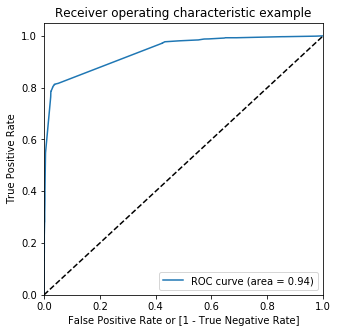

In [75]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Finding Optimal Cutoff Point

In [76]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.229239,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.480434,1012,1,1,1,1,1,1,0,0,0,0,0
2,0,0.000742,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.866660,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.976713,7987,1,1,1,1,1,1,1,1,1,1,1


In [77]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.725083  0.977514  0.566965
0.2   0.2  0.728704  0.972200  0.576184
0.3   0.3  0.899228  0.816435  0.951088
0.4   0.4  0.903952  0.813573  0.960563
0.5   0.5  0.905527  0.811938  0.964149
0.6   0.6  0.905212  0.807032  0.966709
0.7   0.7  0.904267  0.799673  0.969782
0.8   0.8  0.893875  0.762061  0.976440
0.9   0.9  0.773422  0.417007  0.996671


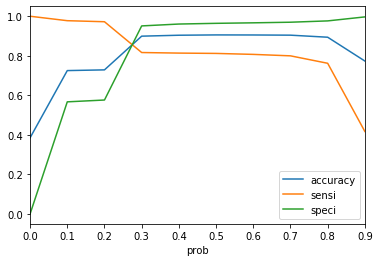

In [78]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2.7 is the optimum point to take it as a cutoff probability.

In [79]:
cutoff = 0.3

In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > cutoff else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229239,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.480434,1012,1,1,1,1,1,1,0,0,0,0,0,1
2,0,0.000742,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.866660,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.976713,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Accurecy

In [81]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8992284679578019

In [82]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3714,  191],
       [ 449, 1997]], dtype=int64)

In [83]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity , Specificity , False Positive Rate and False Negative Rate on Train Data

In [84]:

# Sensitivity : Predicted Converted Out of Actual Converted
print("Sensitivity : Predicted Converted Out of Actual Converted : ",round(TP / float(TP+FN),2))
# Specificity : Predicted Not Converted out of Actual Not Converted
print("Specificity : Predicted Not Converted out of Actual Not Converted : ",round(TN / float(TN+FP),2))

# False Positive Rate : Predicted Converted when Lead Has Not converted
print("False Positive Rate : Predicted Converted when Lead Has Not converted : ",round(FP/ float(TN+FP),2))

# False Negative Rate : Predicted Not converted When The Lead Has Actually converted  
print ("False Negative Rate : Predicted Not converted When The Lead Has Actually converted : ",round(FN/ float(FN+TP),2))

Sensitivity : Predicted Converted Out of Actual Converted :  0.82
Specificity : Predicted Not Converted out of Actual Not Converted :  0.95
False Positive Rate : Predicted Converted when Lead Has Not converted :  0.05
False Negative Rate : Predicted Not converted When The Lead Has Actually converted :  0.18


## Precision and Recall

In [85]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3714,  191],
       [ 449, 1997]], dtype=int64)

##### Precision

In [86]:
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9127056672760512

##### Recall

In [87]:
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8164349959116926


#### Using sklearn utilities for the same


In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9127056672760512

In [90]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8164349959116926

### Precision and recall tradeoff

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

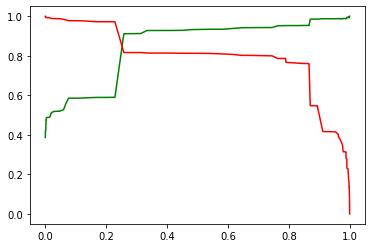

In [94]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set


In [95]:
X_test[['TotalVisits','TotalTimeWebsite','ViewsPerVisit']] = scaler.transform(X_test[['TotalVisits','TotalTimeWebsite','ViewsPerVisit']])

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0
7936,0,0,0,0,0,0,0,0,1,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,1,0,0


In [97]:
X_test_sm = sm.add_constant(X_test)

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Making predictions on the test set

In [98]:
y_test_pred = res.predict(X_test_sm)

In [99]:
y_test_pred[:10]

3271    0.229239
1490    0.990643
7936    0.229239
4216    0.999672
3830    0.229239
1800    0.990643
6507    0.015978
4821    0.002283
4223    0.962632
4714    0.229239
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [101]:
# Let's see the head
y_pred_1.head()

,0
3271,0.229239
1490,0.990643
7936,0.229239
4216,0.999672
3830,0.229239


In [102]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [103]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [104]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.229239
1,1,1490,0.990643
2,0,7936,0.229239
3,1,4216,0.999672
4,0,3830,0.229239


In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [108]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.229239
1,1490,1,0.990643
2,7936,0,0.229239
3,4216,1,0.999672
4,3830,0,0.229239


In [110]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > cutoff else 0)

In [111]:
y_pred_final[y_pred_final['Converted_Prob']>0.2].sort_values(by='Converted_Prob').head(500)

,Prospect ID,Converted,Converted_Prob,final_predicted
1284,8028,1,0.225321,0
0,3271,0,0.229239,0
1475,4582,0,0.229239,0
1477,7477,0,0.229239,0
1480,2915,0,0.229239,0
1487,8747,0,0.229239,0
1496,8166,0,0.229239,0
1497,3202,0,0.229239,0
1501,3742,0,0.229239,0
1506,8196,0,0.229239,0


### Model Accurecy On Train Data

In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.89386705839148

In [113]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1644,   90],
       [ 199,  790]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity , Specificity , False Positive Rate and False Negative Rate On Test Data

In [115]:

# Sensitivity : Predicted Converted Out of Actual Converted
print("Sensitivity : Predicted Converted Out of Actual Converted : ",round(TP / float(TP+FN),2))
# Specificity : Predicted Not Converted out of Actual Not Converted
print("Specificity : Predicted Not Converted out of Actual Not Converted : ",round(TN / float(TN+FP),2))

# False Positive Rate : Predicted Converted when Lead Has Not converted
print("False Positive Rate : Predicted Converted when Lead Has Not converted : ",round(FP/ float(TN+FP),2))

# False Negative Rate : Predicted Not converted When The Lead Has Actually converted  
print ("False Negative Rate : Predicted Not converted When The Lead Has Actually converted : ",round(FN/ float(FN+TP),2))

Sensitivity : Predicted Converted Out of Actual Converted :  0.8
Specificity : Predicted Not Converted out of Actual Not Converted :  0.95
False Positive Rate : Predicted Converted when Lead Has Not converted :  0.05
False Negative Rate : Predicted Not converted When The Lead Has Actually converted :  0.2


## Below are the Accessibility Numbers:

#### Train Data Set:

•	Accuracy : 89.9%

•	Sensitivity : Predicted Converted Out of Actual Converted :  0.82

•	Specificity : Predicted Not Converted out of Actual Not Converted :  0.95

•	False Positive Rate : Predicted Converted when Lead Has Not converted :  0.05

•	False Negative Rate : Predicted Not converted When The Lead Has Actually converted :  0.18


#### Test Data Set:

•	Accuracy: 89.3
•	Sensitivity : Predicted Converted Out of Actual Converted : 0.8

•	Specificity : Predicted Not Converted out of Actual Not Converted : 0.95 

•	False Positive Rate : Predicted Converted when Lead Has Not converted : 0.05 

•	False Negative Rate : Predicted Not converted When The Lead Has Actually converted : 0.2

### Learnings:
As per the current cutoff of 0.3 % 

The model has approx. 89 % accuracy with 80% sensitivity and 95% Specificity, hence we can apply the model to predict approx. 80% chances of a lead to get converted. 
Salesperson can focus on the leads to increase the Lead Conversion Rate of XEducation.

We can decrease the cutoff to 0.2, to predict more leads that has chances to get converted. In this case with more staff sales staff, we can focus on more leads.

Similarly, in we can increase the cutoff to be conservative about the cases which to get converted so that sales team can focus on the strategy for the next year.
